# Predicting Termite Discovery Using Neural Networks

In this notebook, we will demonstrate how to use neural networks to predict termite discovery based on environmental and wood-related features. We'll cover the following steps:
1. Data loading and preprocessing.
2. Building a neural network model.
3. Training the model and evaluating its performance.

Let's start by setting up our environment and loading the necessary libraries.


In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('../../global_termite_microbe_wd.csv')  # Adjust the path as needed
data.head()


,country,site,latitude,longitude,habitat_type,wood_used,wood_origin,N_pc,C_pc,P_pc,...,treatment,deployment_date,harvest_date,date_diff,initial_wt,final_wt,k_value,termite_discovery,fungal_damage,termite_damage
0,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,128.253,124.455,0.027455,0.0,NaN,NaN
1,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2020-01-23T00:00:00Z,834,118.588,73.688,0.208385,0.0,NaN,NaN
2,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2018-11-15T00:00:00Z,400,139.887,102.724,0.281967,0.0,NaN,NaN
3,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2020-01-23T00:00:00Z,834,152.744,109.133,0.147238,0.0,NaN,NaN
4,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,163.892,155.943,0.045400,0.0,NaN,NaN


## Data Preprocessing

To prepare our data for the neural network, we need to perform several preprocessing steps:
1. Handle missing data by removing rows where the target variable 'termite_discovery' is missing.
2. Convert date columns from string format to datetime.
3. Calculate the deployment duration as a new feature.
4. Normalize numerical features and encode categorical features.


In [171]:
# Handle missing data: Drop rows where 'termite_discovery' is missing
data_cleaned = data.dropna(subset=['termite_discovery'])

# Convert date columns to datetime
data_cleaned['deployment_date'] = pd.to_datetime(data_cleaned['deployment_date'], errors='coerce')
data_cleaned['harvest_date'] = pd.to_datetime(data_cleaned['harvest_date'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Calculate deployment duration in days
data_cleaned['deployment_duration'] = (data_cleaned['harvest_date'] - data_cleaned['deployment_date']).dt.days

# Feature Engineering and Normalization
categorical_cols = ['country', 'habitat_type', 'wood_used', 'wood_origin', 'treatment']
numerical_cols = ['latitude', 'longitude', 'N_pc', 'C_pc', 'P_pc', 'initial_wt', 'final_wt', 'k_value', 'deployment_duration']

# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object to transform data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply transformations
X = preprocessor.fit_transform(data_cleaned)
y = data_cleaned['termite_discovery'].values  # Target variable


C:\Users\isabe\AppData\Local\Temp\ipykernel_11084\310977453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['deployment_date'] = pd.to_datetime(data_cleaned['deployment_date'], errors='coerce')
C:\Users\isabe\AppData\Local\Temp\ipykernel_11084\310977453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['harvest_date'] = pd.to_datetime(data_cleaned['harvest_date'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
C:\Users\isabe\AppData\Local\Temp\ipykernel_11084\310977453.py:9: S

## Building the Neural Network

Now, we'll build a neural network model that is suitable for binary classification. The network will have the following structure:
1. An input layer that accepts data with the same number of features as our processed input data.
2. Several hidden layers with ReLU activation to introduce non-linearity.
3. An output layer with a sigmoid activation function, suitable for binary classification.
4. We'll use Adam optimizer with a low learning rate to ensure smooth convergence.


In [172]:
# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Adjust the learning rate of the optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])


c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model and Evaluating Performance

We will now train our model and evaluate its performance. We will also plot training and validation accuracy and loss to monitor overfitting.


Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8589 - loss: 0.5498 - val_accuracy: 0.8661 - val_loss: 0.3537
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3227 - val_accuracy: 0.8854 - val_loss: 0.2737
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2630 - val_accuracy: 0.9005 - val_loss: 0.2447
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8998 - loss: 0.2380 - val_accuracy: 0.9083 - val_loss: 0.2300
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.2185 - val_accuracy: 0.9101 - val_loss: 0.2215
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9116 - loss: 0.2135 - val_accuracy: 0.9113 - val_loss: 0.2153
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.2025 - val_accuracy: 0.9156 - val_loss: 0.2095
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9124 - loss: 0.2017 - val_accuracy: 0.

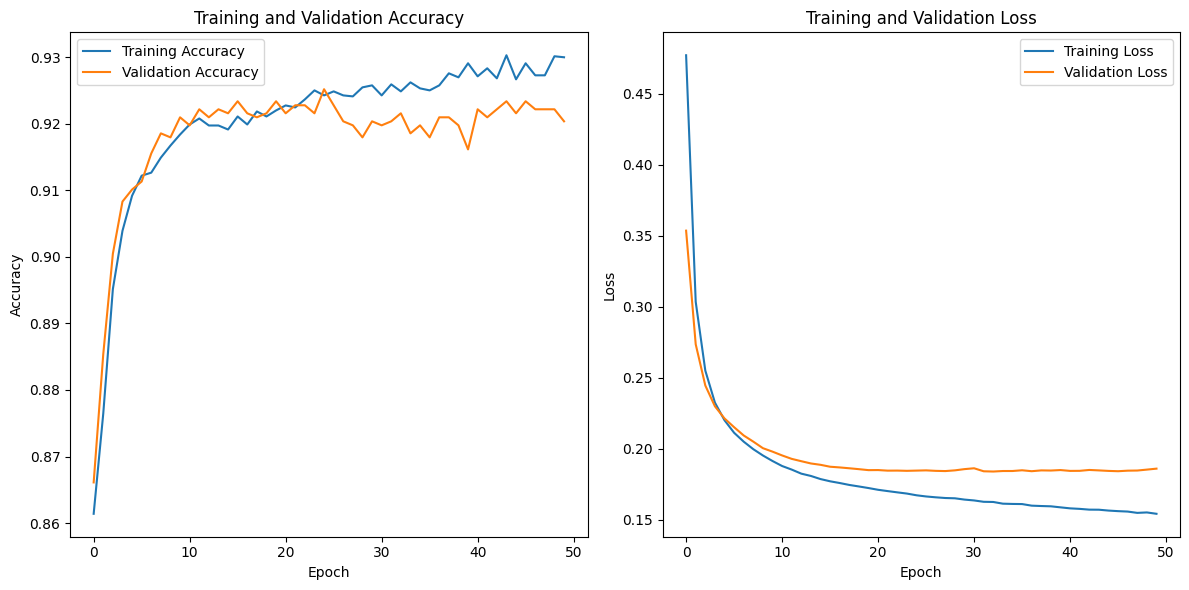

In [173]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)  # Increase epochs to 50 for a more detailed plot

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


As the plots show, the training and validation loss decrease consistently which is what is expected. The plot with the training and validation accuracy shows when the model reaches overfitting. Although the training accuracy increases throughout the epochs, the validation accuracy begins to decrease at around 25 epochs which indicates that the model has begun to overfit to the training data.

## Conclusion

This notebook demonstrated the steps required to prepare data, build a neural network, and train it for binary classification. We observed the model's performance and discussed how to identify and address overfitting. Future steps could involve experimenting with different architectures, tuning hyperparameters, or using advanced techniques like dropout and batch normalization to further enhance the model's performance.
